In [10]:
import os
import scipy
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            with Image.open(img_path) as img:
                # Convert to grayscale ('L') and resize to 64x64
                img_gray = img.convert('L').resize((64, 64))
                images.append(np.array(img_gray))
        except IOError:
            pass
    return images

# Path to the folder containing the cat images
data_folder = './data/'
imgs = load_images_from_folder(data_folder)

In [11]:
# 'imgs' is a list of image matrices (64x64)
imgs_flatten = np.array([im.reshape(-1) for im in imgs])

In [12]:
def center_data(Y):
    # Calculate the mean vector for each column (axis=0)
    mean_vector = np.mean(Y, axis=0)
    # Subtract the mean vector from the original data matrix
    X = Y - mean_vector
    return X, mean_vector

# Apply the function
X, mean_vector = center_data(imgs_flatten)

In [13]:
def get_cov_matrix(X):
    # Number of observations
    m = X.shape[0]
    # Calculate the covariance matrix
    cov_matrix = np.dot(X.T, X) / (m - 1)
    return cov_matrix

# Apply the function
cov_matrix = get_cov_matrix(X)

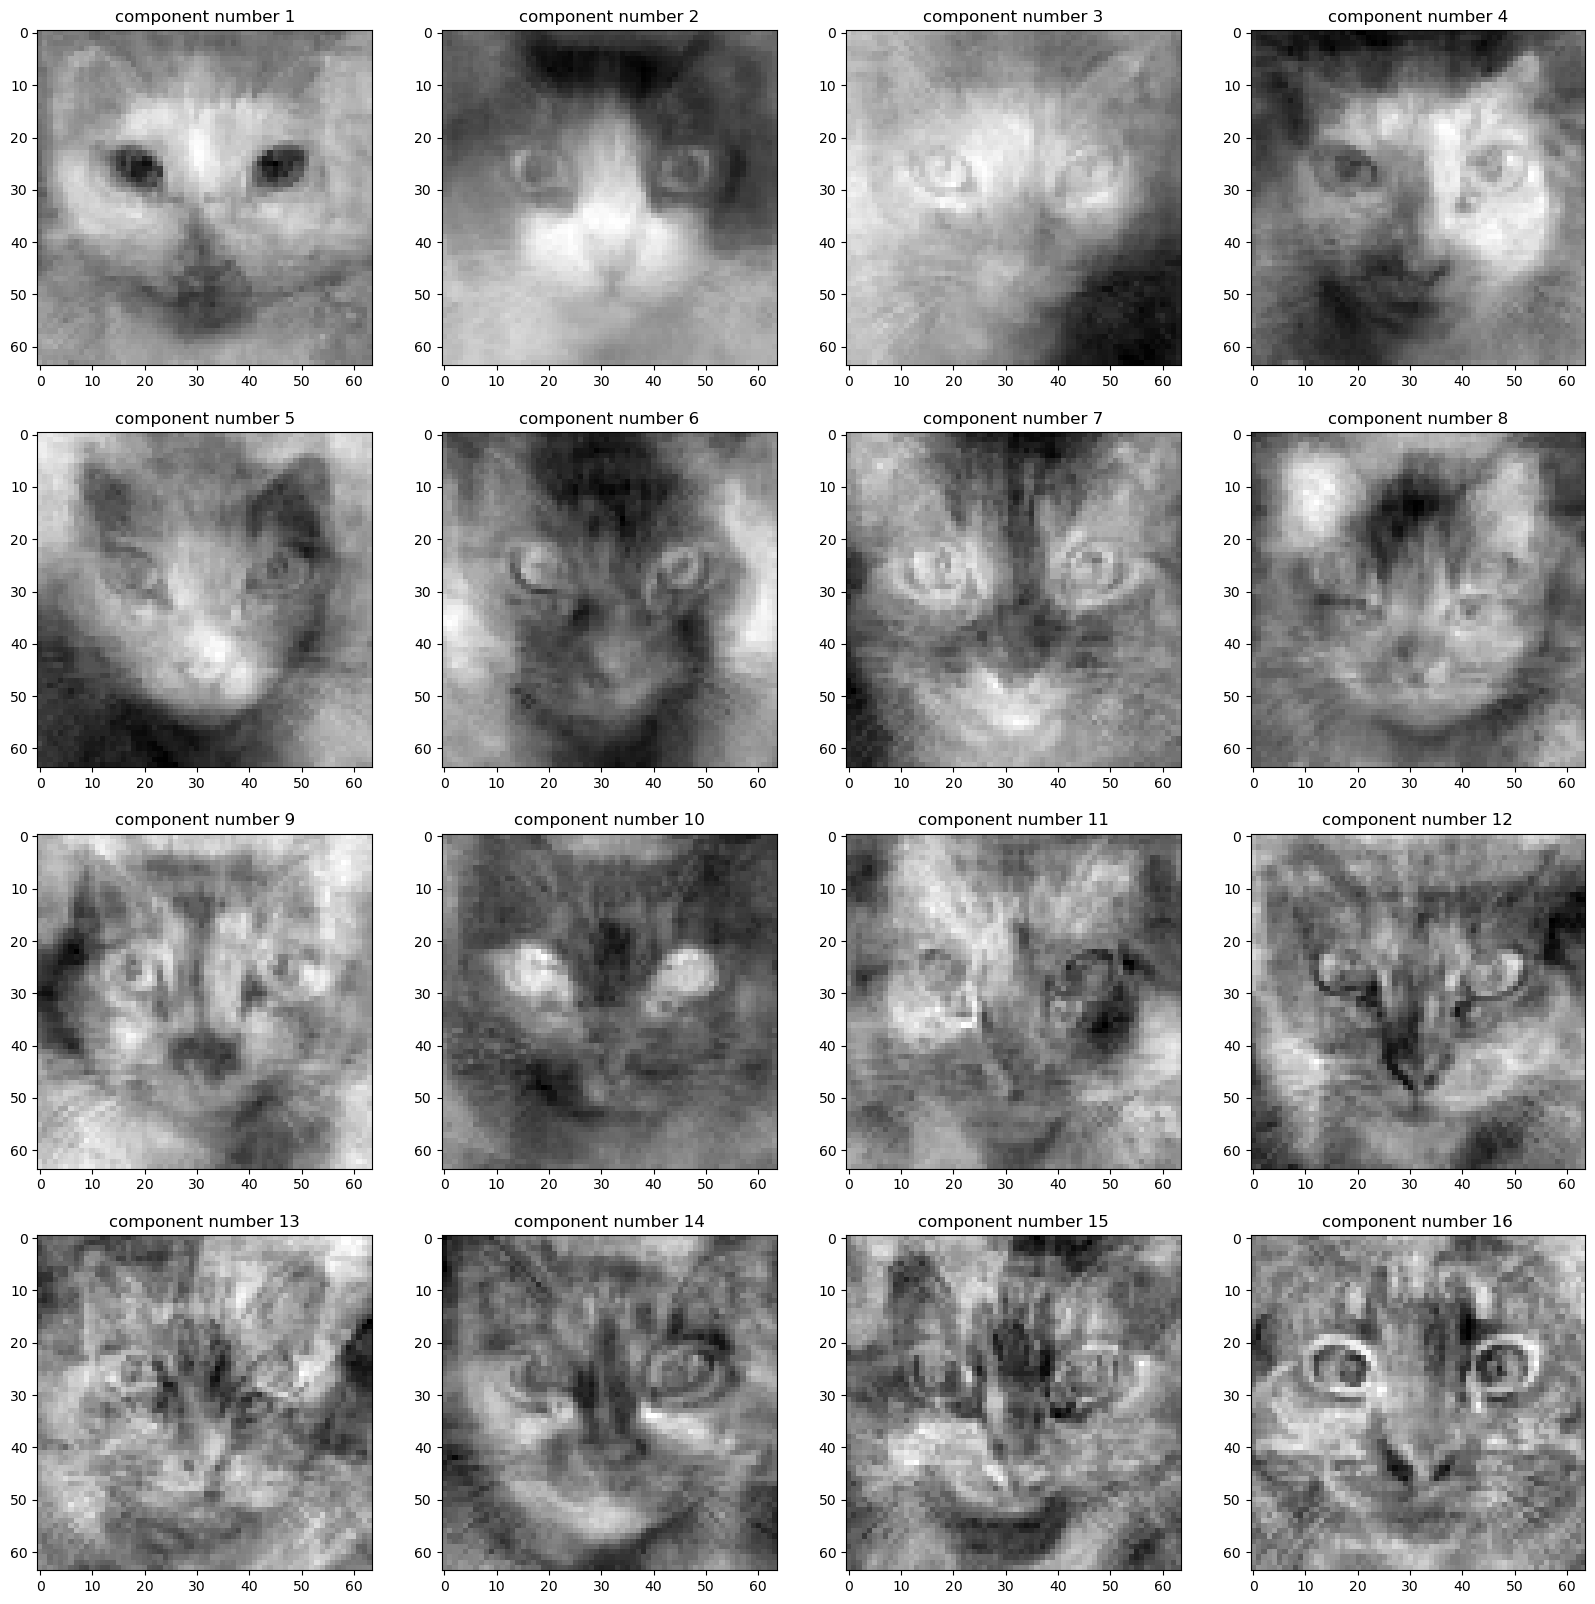

In [ ]:
# 'k' is the number of largest eigenvalues/vectors to find
eigenvals, eigenvecs = scipy.sparse.linalg.eigsh(cov_matrix, k=55)
# More robust but less performing option:
# eigenvals, eigenvecs = np.linalg.eigh(cov_matrix)

# Sort them from highest to lowest
eigenvals = eigenvals[::-1]
eigenvecs = eigenvecs[:,::-1]

height, width = imgs[0].shape
fig, ax = plt.subplots(4,4, figsize=(20,20))
for n in range(4):
    for k in range(4):
        ax[n,k].imshow(eigenvecs[:,n*4+k].reshape(height,width), cmap='gray')
        ax[n,k].set_title(f'component number {n*4+k+1}')

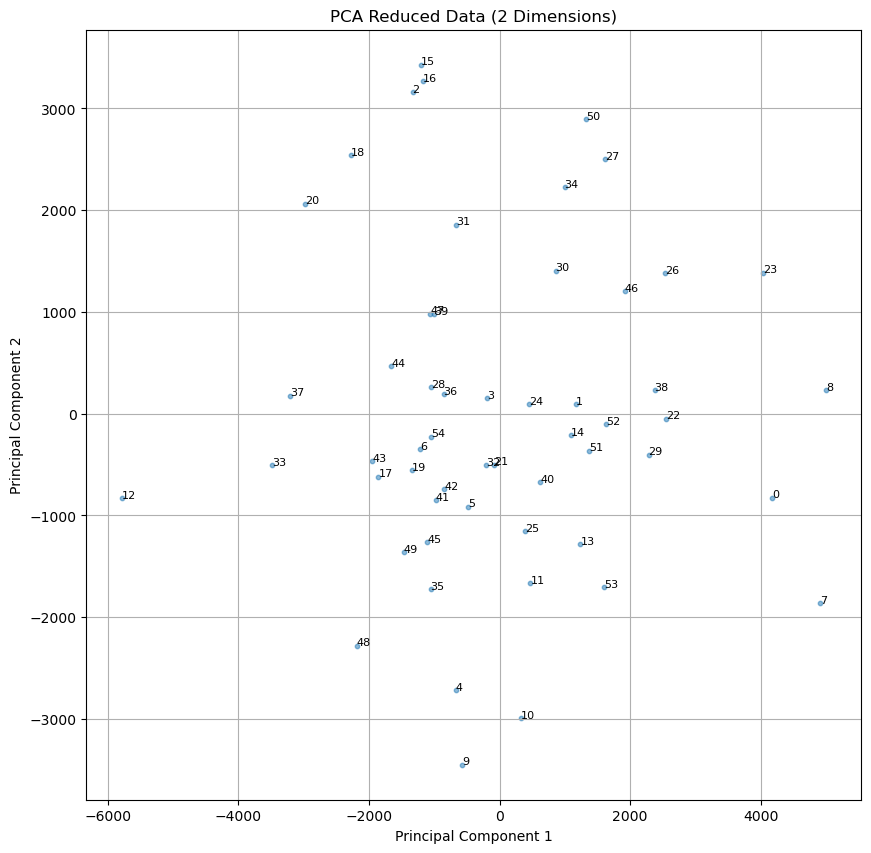

In [27]:
def perform_PCA(X, eigenvecs, k):
    # Select the first k eigenvectors
    V_k = eigenvecs[:, :k]
    # Project the data
    X_red = np.dot(X, V_k)
    return X_red

# Reduce to 2 dimensions
X_red_2 = perform_PCA(X, eigenvecs, 2)

# graphing the reduced data with number of image in each point
plt.figure(figsize=(10, 10))
plt.scatter(X_red_2[:, 0], X_red_2[:, 1], s=10, alpha=0.5)
for i in range(len(X_red_2)):
    plt.annotate(str(i), (X_red_2[i, 0], X_red_2[i, 1]), fontsize=8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Reduced Data (2 Dimensions)')
plt.grid()
plt.show()

Text(0.5, 0.98, 'Similar cats')

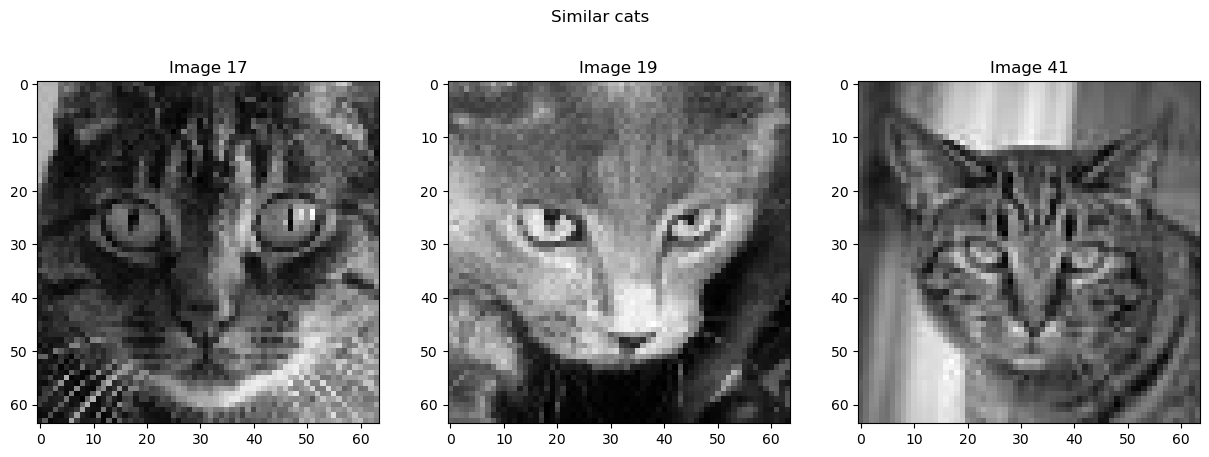

In [26]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(imgs[17], cmap='gray')
ax[0].set_title('Image 17')
ax[1].imshow(imgs[19], cmap='gray')
ax[1].set_title('Image 19')
ax[2].imshow(imgs[41], cmap='gray')
ax[2].set_title('Image 41')
plt.suptitle('Similar cats')

Text(0.5, 0.98, 'Different cats')

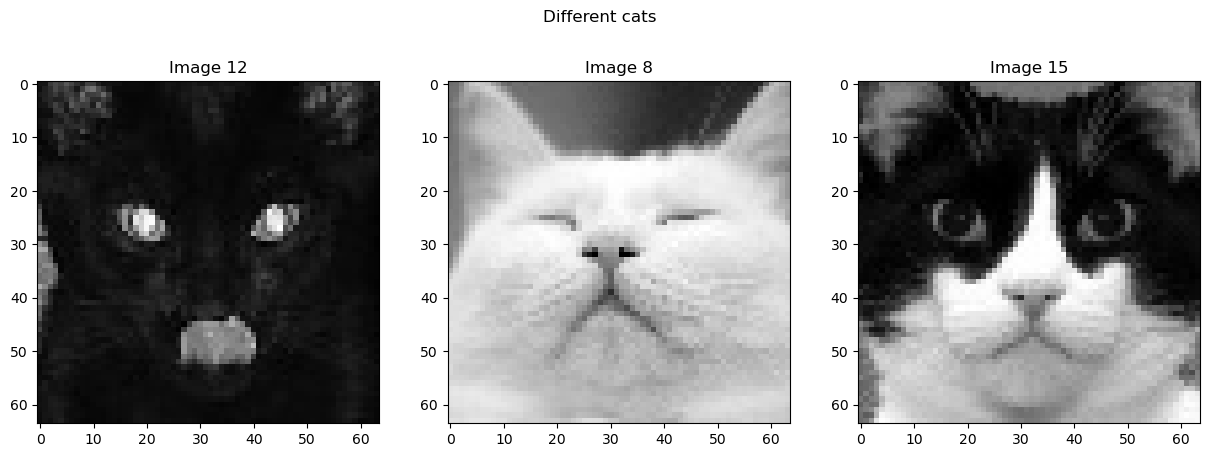

In [25]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(imgs[12], cmap='gray')
ax[0].set_title('Image 12')
ax[1].imshow(imgs[8], cmap='gray')
ax[1].set_title('Image 8')
ax[2].imshow(imgs[15], cmap='gray')
ax[2].set_title('Image 15')
plt.suptitle('Different cats')

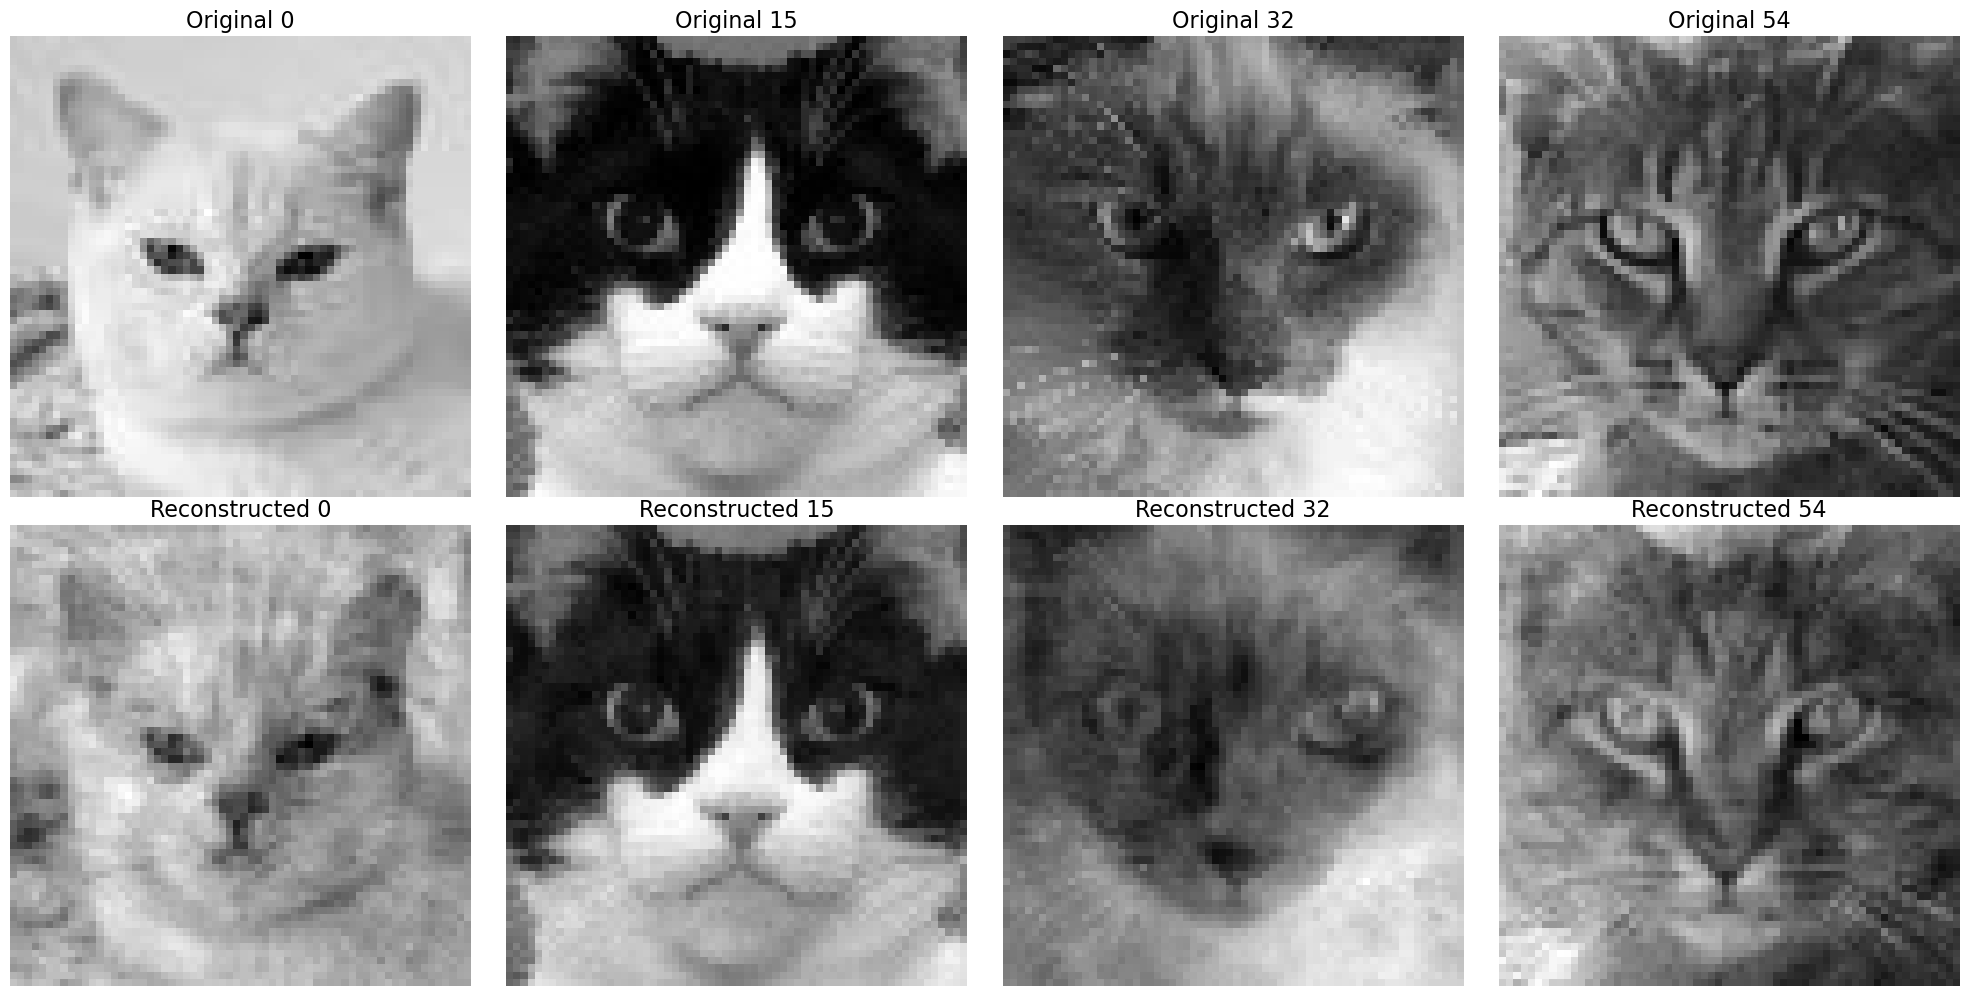

In [ ]:
def reconstruct_image(Xred, eigenvecs):
    X_reconstructed = Xred.dot(eigenvecs[:,:Xred.shape[1]].T)
    X_reconstructed = X_reconstructed + mean_vector
    return X_reconstructed

# Reconstruct from 35 components
Xred35 = perform_PCA(X, eigenvecs, 35) # reduce dimensions to 35 components
Xrec35 = reconstruct_image(Xred35, eigenvecs) # reconstruct image from 35 components

fig, ax = plt.subplots(2, 4, figsize=(20, 10))

indices = [0, 15, 32, 54]
for i, idx in enumerate(indices):
    # Upper: originals
    ax[0, i].imshow(imgs[idx], cmap='gray')
    ax[0, i].set_title(f'Original {idx}', size=16)
    ax[0, i].axis('off')
    # Under: reconstructed
    ax[1, i].imshow(Xrec35[idx].reshape(height, width), cmap='gray')
    ax[1, i].set_title(f'Reconstructed {idx}', size=16)
    ax[1, i].axis('off')

plt.tight_layout()
plt.show()